#IS 470 EXAM 2

---

# Customer Purchase Prediction
<br>
Banks can generate significant profits from term deposits such as a certificate of deposit (CD). These deposits are required to be held for a certain period of time, which gives the bank access to those funds for lending purposes at a higher rate than the rate paid for the deposit. Of course, marketing term deposit products to customers can be expensive, so the bank will want to focus their efforts on those customers most likely to buy these products.<br>
<br>
In this data set, we have information about 45,211 customers, including demographic information as well as data related to their prior experience with the bank and previous marketing campaigns.Additionally, we have a class variable "y" that indicates whether this customer purchased a term product in the most recent marketing campaign.  Our objective is to predict which customers will purchase a term product if we spend the money to advertise to them.  We want to develop a model that will maximize the returns based on the costs of marketing and the benefits of customer purchase. <br>
<br>
This data was from a paper published by Moro et al. (S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014)
<br><br>
VARIABLE DESCRIPTIONS:<br>
1 - age (numeric) <br>
2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") <br>
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed) <br>
4 - education (categorical: "unknown","secondary","primary","tertiary") <br>
5 - default: has credit in default? (categorical: "yes","no") <br>
6 - balance: average yearly balance, in euros (numeric) <br>
7 - housing: has housing loan? (categorical: "yes","no") <br>
8 - loan: has personal loan? (categorical: "yes","no") <br>
9 - contact: contact communication type (categorical: "unknown","telephone","cellular") <br>
10 - day: last contact day of the month (numeric) <br>
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec") <br>
12 - duration: last contact duration, in seconds (numeric) <br>
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) <br>
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted) <br>
15 - previous: number of contacts performed before this campaign and for this client (numeric) <br>
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success") <br>

<br>
TARGET VARIABLE:<br>
y: has the client subscribed a term deposit? (binary: "yes","no")

## 1.Upload and clean data

In [1]:
# Upload data
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bank.csv to bank.csv
User uploaded file "bank.csv" with length 3751304 bytes


In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [3]:
# Read data
bank = pd.read_csv('bank.csv')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
# Examine the number of rows and cols
bank.shape

(45211, 17)

In [5]:
# Change categorical variables to "category"
bank['job'] = bank['job'].astype('category')
bank['marital'] = bank['marital'].astype('category')
bank['education'] = bank['education'].astype('category')
bank['default'] = bank['default'].astype('category')
bank['housing'] = bank['housing'].astype('category')
bank['loan'] = bank['loan'].astype('category')
bank['contact'] = bank['contact'].astype('category')
bank['month'] = bank['month'].astype('category')
bank['poutcome'] = bank['poutcome'].astype('category')
bank['y'] = bank['y'].astype('category')

In [6]:
# Examine variable type
bank.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

## 2.Data partitioning and inspection code

In [7]:
# Create dummy variables for all categorical variables, except the target variable	(1 point)
bank = pd.get_dummies(bank, columns=['job','marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome' ], drop_first=True)
bank

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,yes,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,yes,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,yes,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
45209,57,668,17,508,4,-1,0,no,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [8]:
# Define target and predictors (1 point)
target = bank['y']
predictors = bank.drop(['y'], axis=1)

In [9]:
# Apply minmax normalization on predictors (1 point)
min_max_scaler = preprocessing.MinMaxScaler()
predictors_normalized = pd.DataFrame(min_max_scaler.fit_transform(predictors))
predictors_normalized.columns = predictors.columns
predictors_normalized

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.092259,0.133333,0.053070,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.337662,0.073067,0.133333,0.030704,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.194805,0.072822,0.133333,0.015453,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.376623,0.086476,0.133333,0.018707,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.194805,0.072812,0.133333,0.040260,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.080293,0.533333,0.198658,0.032258,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
45207,0.688312,0.088501,0.533333,0.092721,0.016129,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
45208,0.701299,0.124689,0.533333,0.229158,0.064516,0.212156,0.010909,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
45209,0.506494,0.078868,0.533333,0.103294,0.048387,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [10]:
# Partition the data to predictors_train, predictors_test, target_train, and target_test. Set test_size=0.3 and random_state=0. (1 point)
predictors_train_bank, predictors_test_bank, target_train_bank, target_test_bank = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train_bank.shape, predictors_test_bank.shape, target_train_bank.shape, target_test_bank.shape)

(31647, 42) (13564, 42) (31647,) (13564,)


## 3.Neural Network training and testing.

In [11]:
# Build a MLP model contains three hidden layers: 16 hidden nodes for the first hidden layer, 8 hidden nodes for the second hidden layer, and 4 hidden nodes for the third hidden layer. Set random_state=1. (2 points)
model_mlp1 = MLPClassifier(hidden_layer_sizes=(16, 8, 4), random_state=1)
model_mlp1.fit(predictors_train_bank, target_train_bank)

MLPClassifier(hidden_layer_sizes=(16, 8, 4), random_state=1)

In [12]:
# Make predictions on testing data (1 point)
prediction_on_test_bank = model_mlp1.predict(predictors_test_bank)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


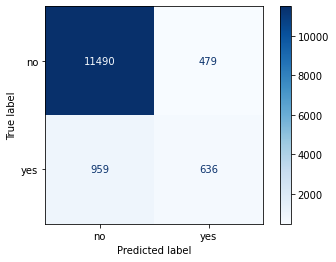

In [13]:
# Examine the evaluation results on testing data: confusion_matrix (1 point)
plot_confusion_matrix(model_mlp1, predictors_test_bank, target_test_bank, cmap=plt.cm.Blues, values_format='d')

In [14]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (1 point)
print(classification_report(target_test_bank, prediction_on_test_bank))

              precision    recall  f1-score   support

          no       0.92      0.96      0.94     11969
         yes       0.57      0.40      0.47      1595

    accuracy                           0.89     13564
   macro avg       0.75      0.68      0.71     13564
weighted avg       0.88      0.89      0.89     13564



***Download the html file and submit to BeachBoard***<br>
<br>
1.   ***Download the IS470_EXAM2.ipynb file***
2.   ***Upload the IS470_EXAM2.ipynb file***
3.   ***Run the code below to generate a html file***
4.   ***Download the html file and submit to BeachBoard***

In [15]:
!jupyter nbconvert --to html IS470_EXAM2.ipynb

[NbConvertApp] Converting notebook IS470_EXAM2.ipynb to html
[NbConvertApp] Writing 346749 bytes to IS470_EXAM2.html
